In [ ]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Classification analysis

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('../results/res_class/metrics/*.csv')

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filepaths]
results = pd.concat(all_dfs, ignore_index=True)

In [ ]:
results.drop(results[results['encoding'] == 'woe'].index, inplace = True)

In [ ]:
results.drop(['accuracy'], axis=1, inplace=True)
results.drop(['AUC'], axis=1, inplace=True)

In [ ]:
results.head()

,encoding,model,precision,recall,F1
0,onehot,nb,0.548450,0.519841,0.291531
1,binary,nb,0.976280,0.967460,0.971764
2,basen,nb,0.981349,0.981349,0.981349
3,hash,nb,0.986486,0.995238,0.990758
4,ordinal,nb,0.981349,0.981349,0.981349


### Macro level

Compute Median Absolute Deviation

In [ ]:
from scipy.stats import median_abs_deviation

In [ ]:
mad_all = pd.DataFrame(results[['model', 'encoding', 'F1']].groupby(by = ['model', 'encoding'], as_index=False,).apply(median_abs_deviation).to_list())
mad_all = round(mad_all, 2)

In [ ]:
mad_all.to_csv("../results/res_class/mad_f1.csv")

Median for each model

In [ ]:
def compute_median(data, metric):
  ris = data[data.model == data.model.unique()[0]].groupby(by=['encoding'], as_index=False, sort=False)[metric].median()
  for model in data.model.unique()[1:]:
    ris[model] = data[data.model == model].groupby(by=['encoding'], as_index=False, sort=False)[metric].median()[metric]
  ris = round(ris, 3)

  return ris

In [ ]:
median_all = compute_median(results, 'F1')

In [ ]:
median_all

,encoding,F1,RF,mlp,knn,svm,lgr,dt
0,onehot,0.627,0.829,0.793,0.638,0.783,0.763,0.816
1,binary,0.658,0.788,0.812,0.643,0.780,0.764,0.786
2,basen,0.660,0.798,0.830,0.722,0.764,0.744,0.820
3,hash,0.648,0.768,0.759,0.641,0.688,0.673,0.695
4,ordinal,0.687,0.835,0.818,0.760,0.789,0.716,0.819
5,gray,0.679,0.843,0.824,0.726,0.799,0.760,0.809
6,rankhot,0.638,0.815,0.805,0.705,0.781,0.765,0.812
7,count,0.675,0.790,0.773,0.693,0.753,0.695,0.731
8,minhash,0.647,0.823,0.819,0.673,0.735,0.763,0.815
9,similarity,0.674,0.824,0.798,0.680,0.778,0.763,0.812


In [ ]:
median_all.to_csv("../results/res_class/median_f1.csv")

### Mood's test on median

In [ ]:
onehot = results_regr[(results_regr['model'] == 'dt') & (results_regr['encoding'] == 'onehot')]['rmse']
best = results_regr[(results_regr['model'] == 'dt') & (results_regr['encoding'] == 'basen')]['rmse']

In [ ]:
from scipy.stats import wilcoxon
res = wilcoxon(onehot, best, alternative='less')
round(res.pvalue, 3)

0.922

### Binary target analysis

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('../results/res_class/metrics/*.csv')

files = ['results_census.csv', 'results_mush.csv', 'results_credit.csv', 'results_breast.csv', 'results_autism.csv', 'results_churn.csv']

filtered_filepaths = [fp for fp in filepaths if os.path.basename(fp) in files]

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filtered_filepaths]
results_binary = pd.concat(all_dfs, ignore_index=True)

In [ ]:
median_binary = compute_median(results_binary, 'F1')

In [ ]:
median_binary

,encoding,F1,RF,mlp,knn,svm,lgr,dt
0,onehot,0.659,0.840,0.777,0.704,0.741,0.763,0.791
1,binary,0.669,0.833,0.803,0.692,0.780,0.764,0.795
2,basen,0.686,0.852,0.825,0.722,0.773,0.744,0.796
3,hash,0.693,0.781,0.769,0.710,0.729,0.741,0.728
4,ordinal,0.703,0.858,0.813,0.735,0.778,0.734,0.793
5,gray,0.711,0.843,0.819,0.726,0.791,0.760,0.788
6,rankhot,0.698,0.815,0.793,0.705,0.750,0.765,0.786
7,count,0.701,0.851,0.814,0.718,0.779,0.754,0.787
8,minhash,0.654,0.817,0.811,0.686,0.734,0.763,0.788
9,similarity,0.692,0.832,0.787,0.700,0.742,0.763,0.787


In [ ]:
median_binary.to_csv("../results/res_class/median_f1_binary.csv")

### Ranking on median

In [ ]:
def ranking_model(data, model, metric):

  mean_all = data[data.model==model].groupby(by = ['model', 'encoding'], as_index=False, sort=False)[metric].median()
  mean_all = round(mean_all, 3)

  rank_final = pd.DataFrame(mean_all['encoding'].unique(), columns=['encoding'])

  rank_final[model] = mean_all.rank(ascending = False, numeric_only=True)

  return rank_final

In [ ]:
rank_rf = ranking_model(results, 'RF', 'F1')
rank_svm = ranking_model(results, 'svm', 'F1')
rank_nb = ranking_model(results, 'nb', 'F1')
rank_mlp = ranking_model(results, 'mlp', 'F1')
rank_knn = ranking_model(results, 'knn', 'F1')
rank_lgr = ranking_model(results, 'lgr', 'F1')
rank_dt = ranking_model(results, 'dt', 'F1')

rank_total = rank_rf.merge(rank_nb, on=['encoding']).merge(rank_mlp, on=['encoding']).merge(rank_knn, on=['encoding']).merge(rank_svm, on=['encoding']).merge(rank_lgr, on=['encoding']).merge(rank_dt, on=['encoding'])
#rank_total.insert(1, 'family' , rank_total.index > 14) #adds a flag to unsupervised/supervised methods to plot
conditions = [
    (rank_total.index < 4),
    (rank_total.index >= 4) & (rank_total.index <= 7),
    (rank_total.index >= 8) & (rank_total.index <= 10),
    (rank_total.index >= 11) & (rank_total.index <= 14),
    (rank_total.index > 14)
]
'''& (rank_total.index <= 17) | (rank_total.index == 19),
    (rank_total.index == 18)| (rank_total.index == 20)'''
categories = [1, 2, 3, 4, 5]

rank_total['family'] = np.select(conditions, categories)

rank_total.insert(1, 'start', sorted(range(1, len(results['encoding'].unique())+1), reverse=True)) #adds default order in order to be displayed in plot
rank_total

,encoding,start,RF,nb,mlp,knn,svm,lgr,dt,family
0,onehot,21,9.0,17.0,17.0,21.0,10.0,11.5,7.5,1
1,binary,20,18.0,11.0,10.5,19.0,14.0,8.0,17.0,1
2,basen,19,16.0,10.0,6.0,8.0,17.0,17.0,2.0,1
3,hash,18,19.0,13.0,20.0,20.0,21.0,20.0,20.0,1
4,ordinal,17,4.0,5.0,9.0,2.0,7.0,18.0,3.5,2
5,gray,16,1.0,7.0,7.0,7.0,6.0,16.0,15.0,2
6,rankhot,15,14.0,16.0,13.0,12.0,13.0,4.5,13.5,2
7,count,14,17.0,8.0,19.0,14.0,18.0,19.0,18.0,2
8,minhash,13,12.0,14.0,8.0,16.0,19.0,11.5,9.0,3
9,similarity,12,11.0,9.0,15.0,15.0,15.0,11.5,13.5,3


In [ ]:
rank_total[['RF', 'nb', 'mlp', 'knn',	'svm',	'lgr',	'dt']].transpose().mean()

0     13.285714
1     13.928571
2     10.857143
3     19.000000
4      6.928571
5      8.428571
6     12.285714
7     16.142857
8     12.785714
9     12.857143
10    11.571429
11    11.642857
12    11.071429
13    12.000000
14     9.142857
15     6.142857
16     4.714286
17     4.285714
18     9.857143
19     5.071429
20    19.000000
dtype: float64

In [ ]:
import plotly.graph_objects as go
ticks = list(range(1,23, 2))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'rank',
    'height': 500,
    'width': 1000,
    'scale':5 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = rank_total['family'],
                    colorscale = [[0, 'blue'], [0.25, 'green'], [0.5, 'red'], [0.75, 'purple'], [1, '#FF9616']]),
        dimensions = list([
            dict(range = [1,21],
                tickvals = rank_total['start'],
                values = rank_total['start'],
                label = 'default order',
                ticktext = rank_total['encoding']),
            dict(range = [1,21],
                tickvals = ticks,
                label = 'RF', values = rank_total['RF']),
            dict(range = [1,21],
                tickvals = ticks,
                label = 'dt', values = rank_total['dt']),
            dict(range = [1,21],
                 tickvals = ticks,
                label = 'nb', values = rank_total['nb']),
            dict(range = [1,21],
                 tickvals = ticks,
                label = 'mlp', values = rank_total['mlp']),
            dict(range = [1,21],
                 tickvals = ticks,
                label = 'knn', values = rank_total['knn']),
            dict(range = [1,21],
                 tickvals = ticks,
                label = 'lgr', values = rank_total['lgr']),
            dict(range = [1,21],
                 tickvals = ticks,
                label = 'svm', values = rank_total['svm'])])
    )
)

fig.update_layout(title='Ranking by Supervised encoders', width=1000, height=500)

fig.show(config=config)

## Box plots

At least 75% cat var

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('../results/res_class/metrics/*.csv')

files = ['results_mush.csv', 'results_credit.csv', 'results_car.csv', 'results_cmc.csv', 'results_nursery.csv']

filtered_filepaths = [fp for fp in filepaths if os.path.basename(fp) in files]

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filtered_filepaths]
results2 = pd.concat(all_dfs, ignore_index=True)

results2.drop(results2[results2['encoding'] == 'woe'].index, inplace = True)
results2_f1 = results2[['model', 'encoding', 'F1']]

Less than 75% cat var

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('../results/res_class/metrics/*.csv')

files = ['results_mush.csv', 'results_credit.csv', 'results_car.csv', 'results_cmc.csv', 'results_nursery.csv']

filtered_filepaths = [fp for fp in filepaths if os.path.basename(fp) not in files]

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filtered_filepaths]
results3 = pd.concat(all_dfs, ignore_index=True)

results3.drop(results3[results3['encoding'] == 'woe'].index, inplace = True)
results3_f1 = results3[['model', 'encoding', 'F1']]

In [ ]:
def boxplot(data):
  models = data.model.unique()
  fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)

  colors = ['mediumseagreen', 'gold', 'darkorange', 'red', 'deepskyblue', 'blueviolet', 'hotpink']

  for ax, model in enumerate(models):
    sns.boxplot(ax=axes[ax], y=data['encoding'], x=data[data['model'] == model]['F1'], width=.5, color='mediumseagreen')
    axes[ax].set_title(model)

  fig.savefig('../results/res_class/boxplot_75less.pdf')

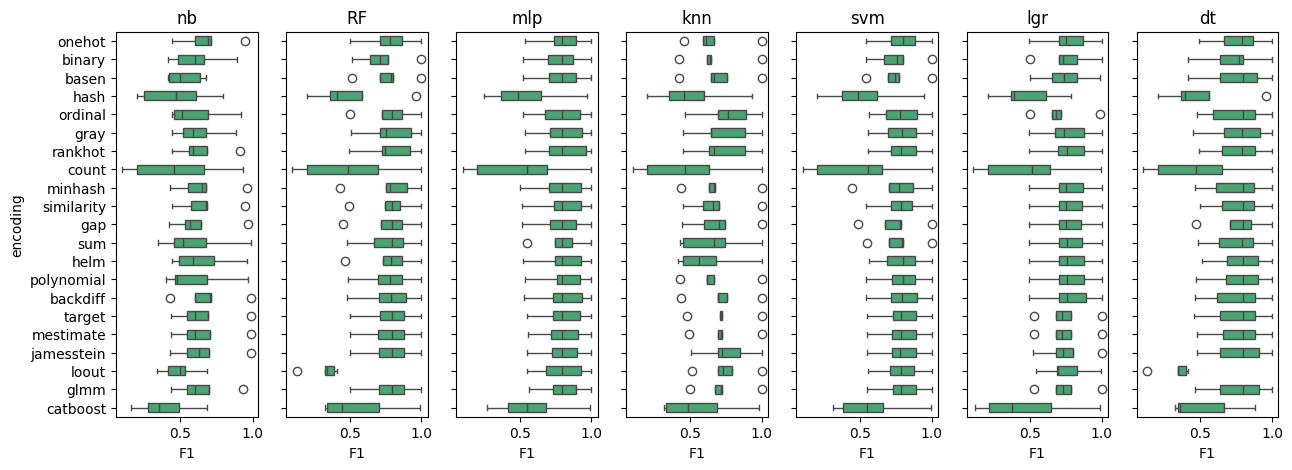

In [ ]:
boxplot(results2_f1)

In [ ]:
boxplot(results3_f1)

## Regression analysis

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('../results/res_regr/metrics/*.csv')

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filepaths]
results_regr = pd.concat(all_dfs, ignore_index=True)

In [ ]:
results_regr.head()

,encoding,model,mae,mse,rmse,nrmse,r2
0,mean,RF,28.848484,12170.862851,110.321634,17.237755,-0.022754
1,mean,mlp,24.401659,11788.304507,108.573959,16.964681,0.009393
2,mean,knn,24.593049,12238.012087,110.625549,17.285242,-0.028397
3,mean,svm,19.497516,12233.200530,110.603800,17.281844,-0.027992
4,mean,lgr,24.914301,11882.025922,109.004706,17.031985,0.001518


In [ ]:
median_all_regr = compute_median(results_regr, 'rmse')

In [ ]:
median_all_regr

,encoding,rmse,mlp,knn,svm,lgr,dt
0,onehot,67.663,8.030200e+01,78.777,100.975,64.990,75.756
1,binary,68.253,8.371800e+01,78.722,100.958,65.267,66.809
2,basen,67.456,8.038200e+01,79.903,100.945,65.521,65.587
3,hash,67.426,8.317800e+01,78.712,100.958,65.293,68.179
4,ordinal,67.920,8.192200e+01,79.986,100.940,65.458,65.905
5,gray,67.618,9.054600e+01,78.650,100.958,65.282,66.641
6,rankhot,68.118,9.166200e+01,78.750,100.975,64.990,66.537
7,count,67.897,8.481700e+01,80.997,100.934,65.600,66.543
8,minhash,67.360,1.977933e+07,94.003,99.655,64.884,75.065
9,similarity,67.412,8.437000e+01,78.743,100.975,64.990,77.124


In [ ]:
median_all_regr.to_csv("../results/res_regr/median_rmse.csv")

In [ ]:
def ranking_model_regr(data, model, metric):

  mean_all = data[data.model==model].groupby(by = ['model', 'encoding'], as_index=False, sort=False)[metric].median()
  mean_all = round(mean_all, 3)

  rank_final = pd.DataFrame(mean_all['encoding'].unique(), columns=['encoding'])

  rank_final[model] = mean_all.rank(numeric_only=True)

  return rank_final

In [ ]:
rank_rf = ranking_model_regr(results_regr, 'RF', 'rmse')
rank_svm = ranking_model_regr(results_regr, 'svm', 'rmse')
rank_mlp = ranking_model_regr(results_regr, 'mlp', 'rmse')
rank_knn = ranking_model_regr(results_regr, 'knn', 'rmse')
rank_lgr = ranking_model_regr(results_regr, 'lgr', 'rmse')
rank_dt = ranking_model_regr(results_regr, 'dt', 'rmse')

rank_total_regr = rank_rf.merge(rank_mlp, on=['encoding']).merge(rank_knn, on=['encoding']).merge(rank_svm, on=['encoding']).merge(rank_lgr, on=['encoding']).merge(rank_dt, on=['encoding'])
#rank_total.insert(1, 'family' , rank_total.index > 14) #adds a flag to unsupervised/supervised methods to plot
conditions = [
    (rank_total_regr.index < 4),
    (rank_total_regr.index >= 4) & (rank_total_regr.index <= 7),
    (rank_total_regr.index >= 8) & (rank_total_regr.index <= 10),
    (rank_total_regr.index >= 11) & (rank_total_regr.index <= 14),
    (rank_total_regr.index > 14)
]
'''& (rank_total.index <= 17) | (rank_total.index == 19),
    (rank_total.index == 18)| (rank_total.index == 20)'''
categories = [1, 2, 3, 4, 5]

rank_total_regr['family'] = np.select(conditions, categories)

rank_total_regr.insert(1, 'start', sorted(range(1, len(results_regr['encoding'].unique())+1), reverse=True)) #adds default order in order to be displayed in plot
rank_total_regr

,encoding,start,RF,mlp,knn,svm,lgr,dt,family
0,onehot,23,11.0,3.0,8.5,12.0,6.0,16.0,1
1,binary,22,22.0,10.0,5.0,6.0,10.0,10.0,1
2,basen,21,5.0,4.0,11.0,4.0,14.0,1.0,1
3,hash,20,4.0,9.0,4.0,6.0,12.0,13.0,1
4,ordinal,19,19.0,7.0,12.0,3.0,13.0,2.0,2
5,gray,18,9.0,20.0,3.0,6.0,11.0,8.0,2
6,rankhot,17,20.0,22.0,7.0,12.0,6.0,5.0,2
7,count,16,17.0,14.0,14.0,2.0,17.0,6.0,2
8,minhash,15,2.0,23.0,23.0,1.0,1.0,14.0,3
9,similarity,14,3.0,13.0,6.0,12.0,6.0,21.0,3


In [ ]:
import plotly.graph_objects as go
ticks = list(range(1,25, 2))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'rank_regr',
    'height': 500,
    'width': 1000,
    'scale':10 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = rank_total_regr['family'],
                    colorscale = [[0, 'blue'], [0.25, 'green'], [0.5, 'red'], [0.75, 'purple'], [1, '#FF9616']]),
        dimensions = list([
            dict(range = [1,23],
                tickvals = rank_total_regr['start'],
                values = rank_total_regr['start'],
                label = 'default order',
                ticktext = rank_total_regr['encoding']),
            dict(range = [1,23],
                tickvals = ticks,
                label = 'RF', values = rank_total_regr['RF']),
            dict(range = [1,23],
                tickvals = ticks,
                label = 'dt', values = rank_total_regr['dt']),
            dict(range = [1,23],
                 tickvals = ticks,
                label = 'mlp', values = rank_total_regr['mlp']),
            dict(range = [1,23],
                 tickvals = ticks,
                label = 'knn', values = rank_total_regr['knn']),
            dict(range = [1,23],
                 tickvals = ticks,
                label = 'lgr', values = rank_total_regr['lgr']),
            dict(range = [1,23],
                 tickvals = ticks,
                label = 'svm', values = rank_total_regr['svm'])])
    )
)

fig.update_layout(title='Ranking by Supervised encoders', width=1000, height=500)

fig.show(config=config)

## Time evaluation

In [ ]:
# Assuming all CSV files are in the 'data' directory
filepaths = glob.glob('/content/drive/MyDrive/Codice/results_kaggle_backup/res_regr/time/*.csv')
filepaths2 = glob.glob('/content/drive/MyDrive/Codice/results_kaggle_backup/res_class/time/*.csv')

# Read and concatenate all CSV files
all_dfs = [pd.read_csv(fp) for fp in filepaths+filepaths2]
results4 = pd.concat(all_dfs, ignore_index=True)
remove = ['woe', 'quantile', 'summary']
results4.drop(results4[results4['method'].isin(remove)].index, inplace = True)

Compute mean time

In [ ]:
median_time = results4.groupby(by = ['method'], as_index=False, sort=False)['time'].mean()
median_time = round(median_time, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def time_standard(time_df, col):

  '''
  standardize encoding time and compute quartiles in order to assign a class which describes how fast/slow the encoder is
  '''

  scaler = MinMaxScaler()
  time_scaled = scaler.fit_transform(time_df[col].values.reshape(-1, 1))

  time_df.insert(2, 'time_norm', time_scaled)

  time_df.insert(3, 'class', pd.qcut(time_df['time_norm'], 4, labels=["fast", "medium-fast", "medium-slow", "slow"]))

  return time_df

In [ ]:
median_time_scale = time_standard(median_time, 'time')

In [ ]:
median_time_scale

,method,time,time_norm,class
0,onehot,0.132,0.015844,slow
1,binary,0.101,0.010263,medium-fast
2,basen,0.091,0.008462,fast
3,hash,0.874,0.149442,slow
4,ordinal,0.044,0.000000,fast
5,gray,0.122,0.014044,medium-slow
6,rankhot,4.125,0.734786,slow
7,count,0.096,0.009363,medium-fast
8,minhash,0.066,0.003961,fast
9,similarity,0.127,0.014944,medium-slow


In [ ]:
median_time_scale.to_csv("/content/drive/MyDrive/Codice/results_kaggle/median_time_scaled.csv")

Add final dimension

In [ ]:
dim_mean = results4.groupby(by=['method'], as_index=False, sort=False)['dim_fin'].mean()

In [ ]:
dim_mean = time_standard(dim_mean, 'dim_fin')

ValueError: Bin edges must be unique: array([0.        , 0.        , 0.07445652, 0.2762323 , 1.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

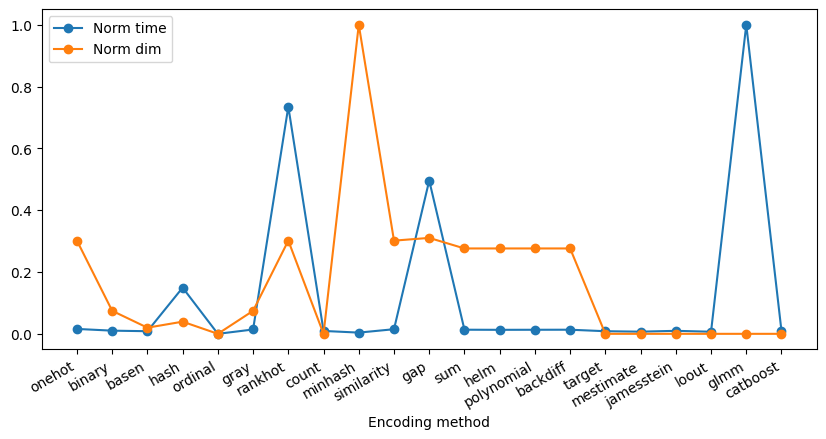

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(median_time_scale['method'], median_time_scale['time_norm'], 'o-')
ax.plot(dim_mean['method'], dim_mean['time_norm'], 'o-')
ax.legend(['Norm time', 'Norm dim'])
ax.set_ylabel('')
ax.set_xlabel('Encoding method')
plt.gcf().autofmt_xdate()
plt.show()
#fig.savefig('/content/drive/MyDrive/Codice/results_kaggle_backup/time_dim.pdf')

In [ ]:
rank_total

,encoding,start,RF,nb,mlp,knn,svm,lgr,dt,family
0,onehot,21,7.0,11.5,2.0,15.0,4.5,3.0,2.0,1
1,binary,20,18.0,9.5,4.5,17.5,9.5,10.0,17.0,1
2,basen,19,11.0,2.5,6.0,12.0,17.0,11.0,10.0,1
3,hash,18,19.0,17.0,16.0,17.5,20.0,15.0,19.0,1
4,ordinal,17,1.0,7.5,13.0,1.0,4.5,12.0,5.0,2
5,gray,16,4.0,5.0,7.5,14.0,9.5,2.0,8.0,2
6,rankhot,15,15.0,16.0,1.0,8.0,4.5,9.0,6.0,2
7,count,14,17.0,1.0,19.0,20.0,21.0,16.5,18.0,2
8,minhash,13,11.0,13.0,18.0,21.0,18.0,14.0,8.0,3
9,similarity,12,13.0,2.5,11.0,10.0,4.5,6.0,14.0,3
